In [1]:
#Avocado - Regression 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('../Data/avocado_price/avocado.csv')
df = df.drop('Unnamed: 0',axis=1)
df.tail()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [2]:
Target = df.AveragePrice

In [3]:
df_x = ['Date','AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [5]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Text(0.5, 1.0, 'Average Price')

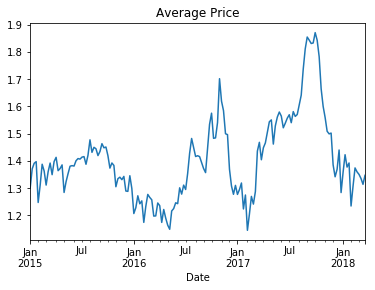

In [7]:
byDate=df.groupby('Date').mean()
plt.figure()
byDate['AveragePrice'].plot()
plt.title('Average Price')

Text(0.5, 1.0, 'Average Price Per Month')

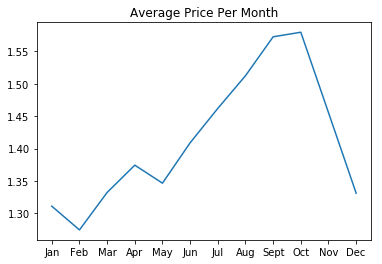

In [8]:
byMonth = df.groupby("Month").mean()
plt.figure()
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['AveragePrice'])
plt.title('Average Price Per Month')

Text(0.5, 1.0, 'Average Price Per Day')

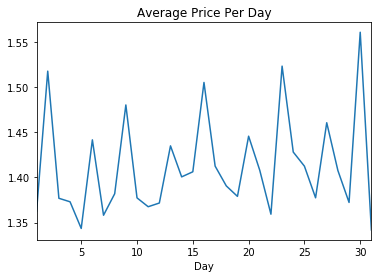

In [9]:
byDay = df.groupby("Day").mean()
plt.figure()
byDay['AveragePrice'].plot()
plt.title('Average Price Per Day')

In [10]:
df = df.drop(['Date'],axis=1)

Text(0.5, 1.0, 'Average Price According to Region')

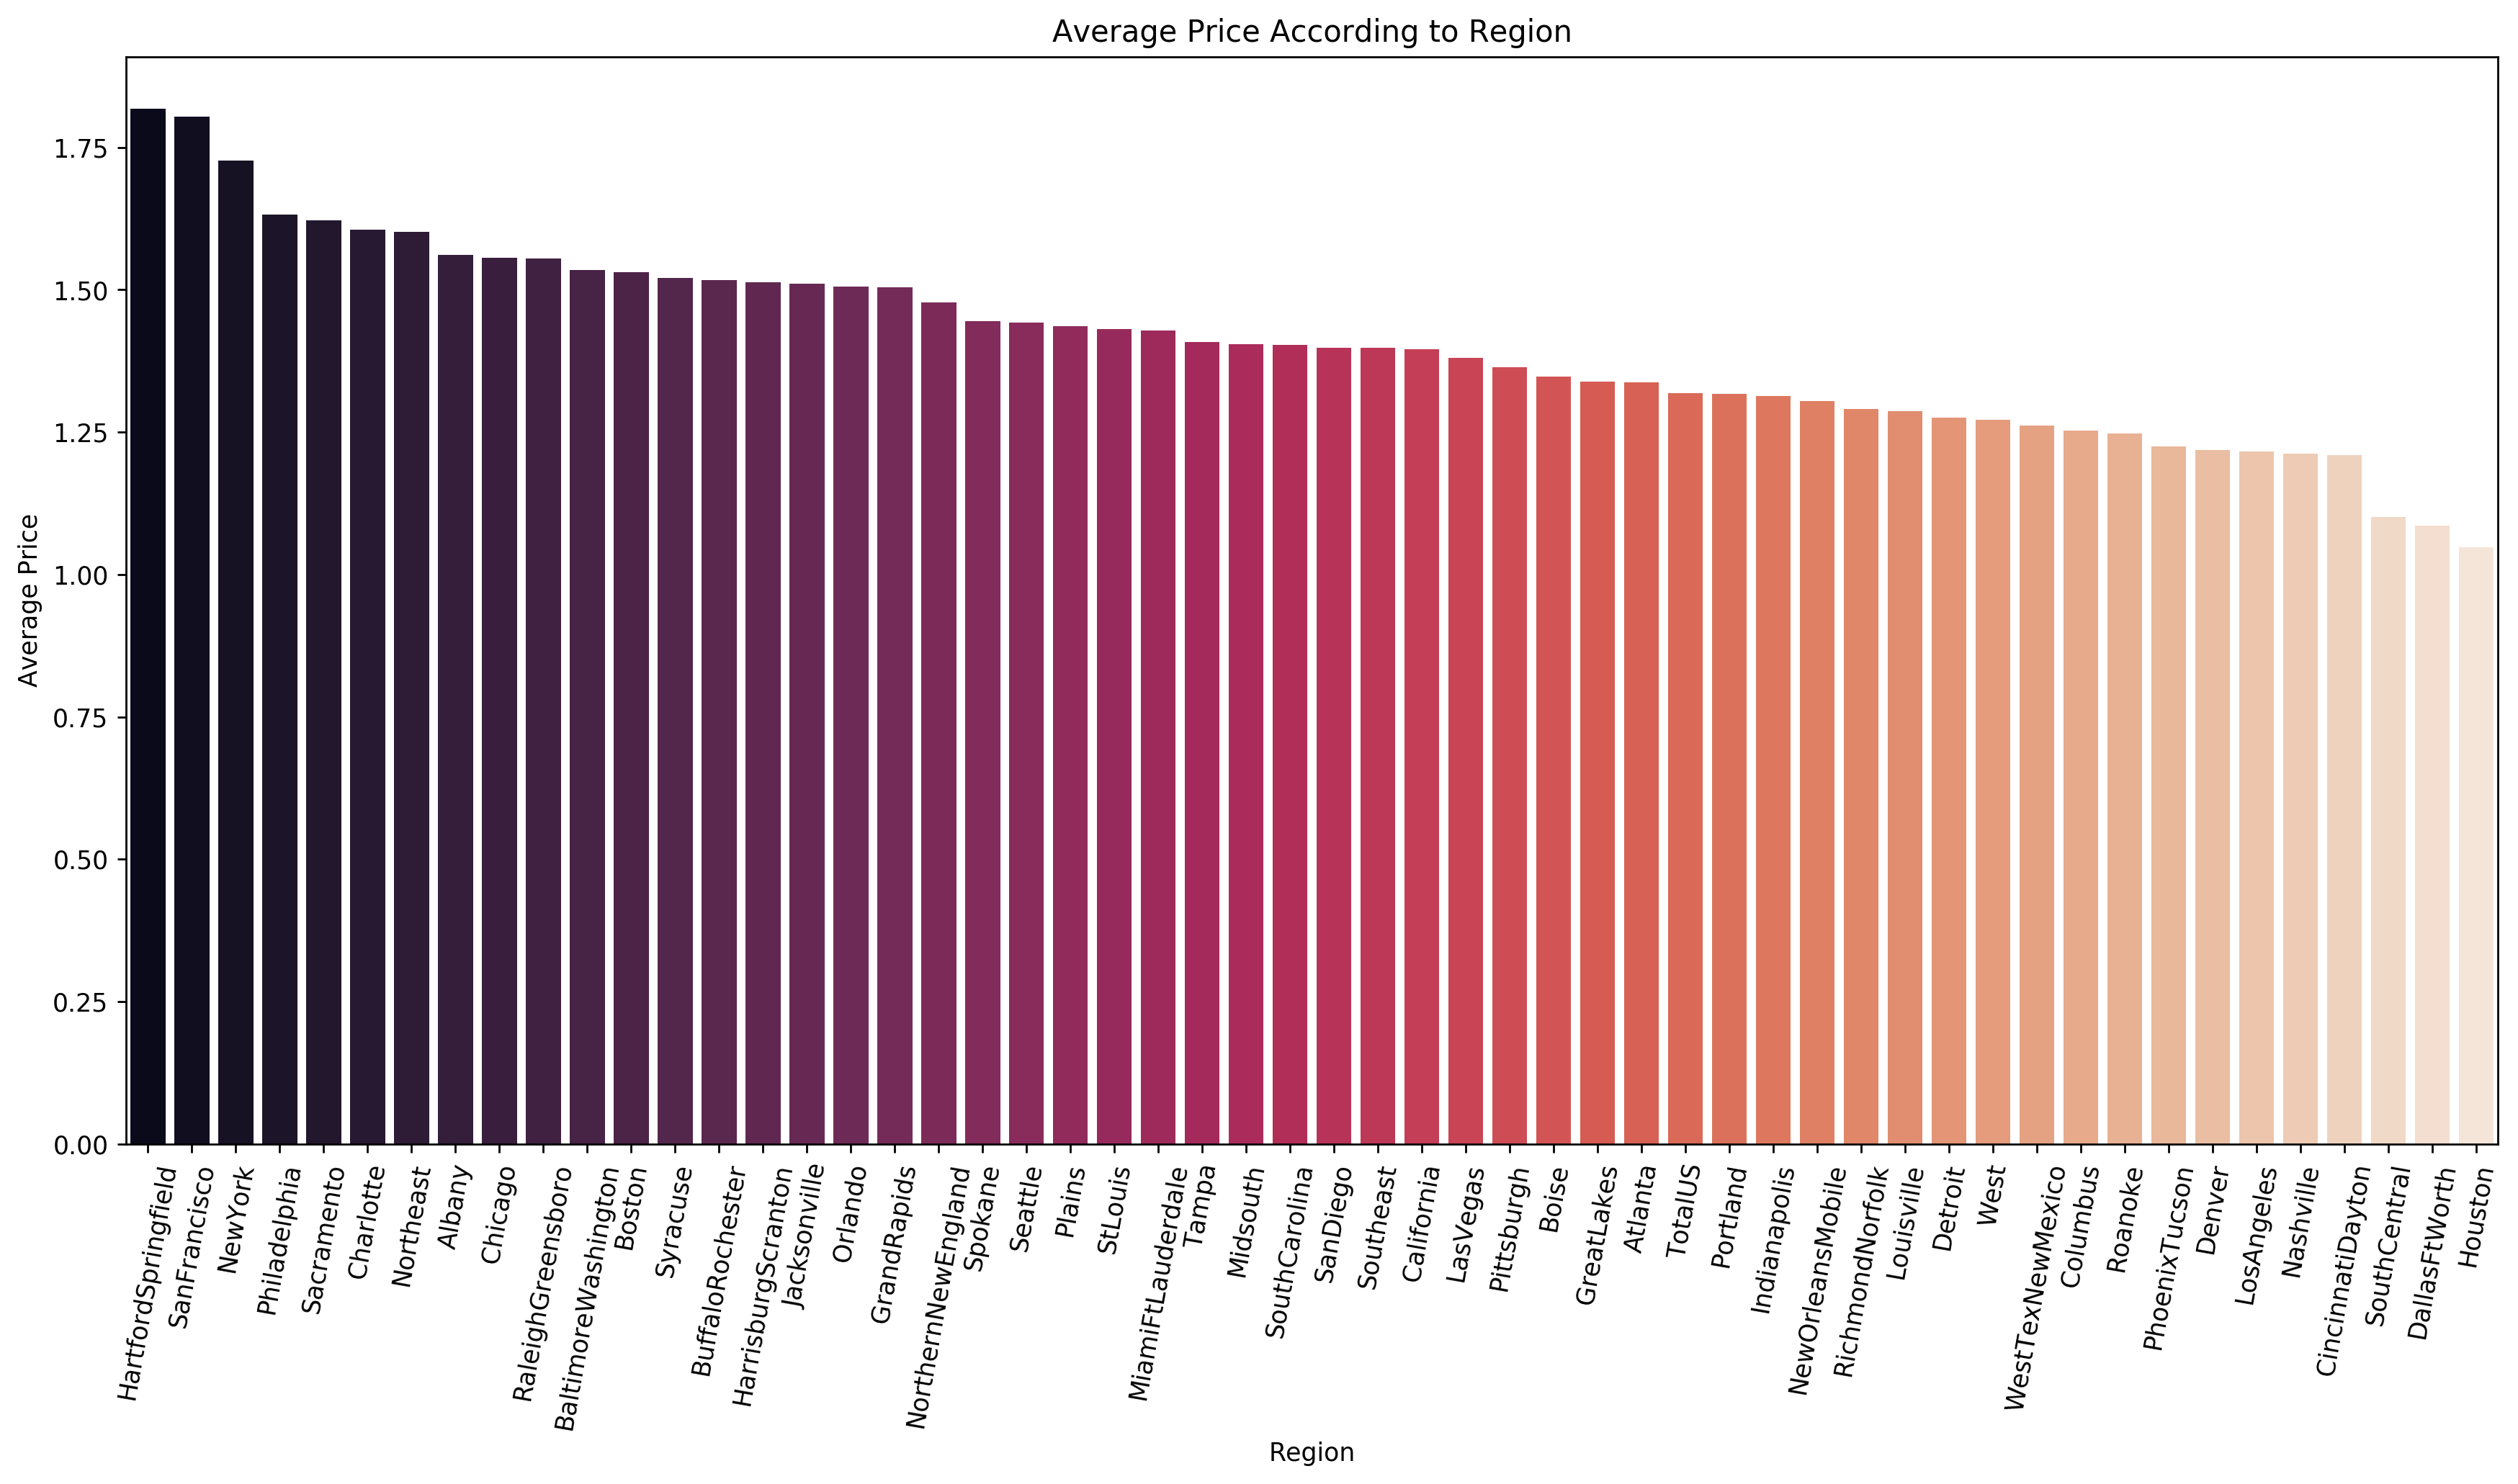

In [11]:
import seaborn as sns

byRegion=df.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
plt.figure(figsize=(17,8),dpi=250)
sns.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion,palette='rocket')
plt.xticks(rotation=80)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

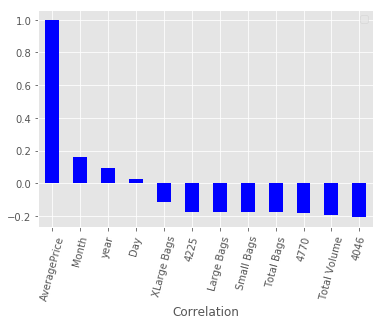

In [12]:
plt.style.use(style='ggplot')
corr = df.corr()
corr_AveragePrice = corr.AveragePrice.sort_values(ascending=False)
corr_AveragePrice.plot(kind='bar', color='blue')
plt.xlabel('Correlation')
plt.ylabel('')
plt.xticks(rotation=75)
plt.legend([])
plt.show()

In [13]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

df = create_dummies(df,'type').drop('type',axis=1)


In [14]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day,type_conventional,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,27,1,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,20,1,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,13,1,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,12,6,1,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,29,1,0


In [15]:
mapping = {'Albany' : '0' , 'Atlanta' : '1' , 'BaltimoreWashington' : '2' , 'Boise' : '3' , 'Boston' : '4' ,'BuffaloRochester' : '5' , 'California' : '6' , 'Charlotte' : '7' , 'Chicago' : '8' ,'CincinnatiDayton' : '9' , 'Columbus' : '10' , 'DallasFtWorth' : '11' , 'Denver' : '12' ,'Detroit' : '13' , 'GrandRapids' : '14' , 'GreatLakes' : '15' , 'HarrisburgScranton' : '16' ,'HartfordSpringfield' : '17' , 'Houston' : '18' , 'Indianapolis' : '19' , 'Jacksonville' : '20' ,'LasVegas' : '21' , 'LosAngeles' : '22' , 'Louisville' : '23' , 'MiamiFtLauderdale' : '24' ,'Midsouth' : '25' , 'Nashville' : '26' , 'NewOrleansMobile' : '27' , 'NewYork' : '28' ,'Northeast' : '29' , 'NorthernNewEngland' : '30' , 'Orlando' : '31' , 'Philadelphia' : '32' ,'PhoenixTucson' : '33' , 'Pittsburgh' : '34' , 'Plains' : '35' , 'Portland' : '36' ,'RaleighGreensboro' : '37' , 'RichmondNorfolk' : '38' , 'Roanoke' : '39' , 'Sacramento' : '40' ,'SanDiego' : '41' , 'SanFrancisco' : '42' , 'Seattle' : '43' , 'SouthCarolina' : '44' ,'SouthCentral' : '45' , 'Southeast' : '46' , 'Spokane' : '47' , 'StLouis' : '48' , 'Syracuse' : '49' ,'Tampa' : '50' , 'TotalUS' : '51' , 'West' : '52' , 'WestTexNewMexico' : '53'}
df.region = df.region.map(mapping)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day,type_conventional,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,12,27,1,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,12,20,1,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,12,13,1,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,12,6,1,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,11,29,1,0


In [16]:
for x in df.columns:
    if (df[x].dtype == 'float64'):
        df[x] = (df[x]*100).astype(int)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day,type_conventional,type_organic
0,133,6423662,103674,5445485,4816,869687,860362,9325,0,2015,0,12,27,1,0
1,135,5487698,67428,4463881,5833,950556,940807,9749,0,2015,0,12,20,1,0
2,93,11822022,79470,10914967,13050,814535,804221,10314,0,2015,0,12,13,1,0
3,108,7899214,113200,7197641,7258,581116,567740,13376,0,2015,0,12,6,1,0
4,128,5103960,94148,4383839,7578,618395,598626,19769,0,2015,0,11,29,1,0


In [17]:
df.to_csv('../Data/avocado_price/no_nan_id.csv')

In [18]:
df=pd.read_csv('../Data/avocado_price/no_nan_id.csv',nrows=1000)

In [19]:
from sklearn.model_selection import train_test_split
X = df.drop(['AveragePrice'],axis=1)
y = df.AveragePrice
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


6.72

In [21]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

6.42

In [22]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1.79

In [23]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

39.1

In [25]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

12.99

In [26]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

1.94

In [27]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

2.84

In [28]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso.fit(X_train,Y_train)
acc_lasso = round(lasso.score(X_train, Y_train) * 100, 2)
acc_lasso

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6625.091399999379, tolerance: 17.274871791044774
  positive)


29.77

In [30]:
from sklearn.linear_model import ElasticNet
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet.fit(X_train,Y_train)
acc_ENet = round(ENet.score(X_train, Y_train) * 100, 2)
acc_ENet

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18054.441302488267, tolerance: 17.274871791044774
  positive)


29.77

In [31]:
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR.fit(X_train,Y_train)
acc_KRR = round(KRR.score(X_train, Y_train) * 100, 2)
acc_KRR

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


-1041.71

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(X_train,Y_train)
acc_GBoost = round(GBoost.score(X_train, Y_train) * 100, 2)
acc_GBoost

99.16

In [33]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','Lasso','ENet','KernelRidge','GBoost'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree,acc_lasso,acc_ENet,acc_KRR,acc_GBoost]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
12,GBoost,99.16
1,KNN,39.10
9,Lasso,29.77
10,ENet,29.77
4,Naive Bayes,12.99
2,Logistic Regression,6.72
0,Support Vector Machines,6.42
6,Stochastic Gradient Decent,2.84


In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt  
lasso_rmse = sqrt(mean_squared_error(Y_test,lasso.predict(X_test)))
knn_rmse = sqrt(mean_squared_error(Y_test,knn.predict(X_test)))
random_forest_rmse = sqrt(mean_squared_error(Y_test,random_forest.predict(X_test)))
gaussian_rmse = sqrt(mean_squared_error(Y_test,gaussian.predict(X_test)))
decision_tree_rmse = sqrt(mean_squared_error(Y_test,decision_tree.predict(X_test)))
ENet_rmse = sqrt(mean_squared_error(Y_test,ENet.predict(X_test)))
KRR_rmse = sqrt(mean_squared_error(Y_test,KRR.predict(X_test)))
GBoost_rmse = sqrt(mean_squared_error(Y_test,GBoost.predict(X_test)))

In [35]:
models = pd.DataFrame({
    'Model': ['KNN', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree','Lasso','ENet','KernelRidge','GBoost'],
    'Score': [knn_rmse ,random_forest_rmse , gaussian_rmse , decision_tree_rmse ,lasso_rmse ,ENet_rmse ,KRR_rmse ,GBoost_rmse]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,KernelRidge,59.972821
2,Naive Bayes,14.852099
5,ENet,14.142028
4,Lasso,14.141970
0,KNN,10.169920
3,Decision Tree,9.304284
1,Random Forest,8.096763
7,GBoost,6.045526
